<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="300" alt="Skills Network Logo">
    </a>
</p>


# Test Environment for Generative AI classroom labs

This lab provides a test environment for the codes generated using the Generative AI classroom.

Follow the instructions below to set up this environment for further use.


# Setup


### Install required libraries

In case of a requirement of installing certain python libraries for use in your task, you may do so as shown below.


In [1]:
%pip install seaborn
import piplite

await piplite.install(['nbformat', 'plotly'])

### Dataset URL from the GenAI lab
Use the URL provided in the GenAI lab in the cell below. 


In [2]:
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMSkillsNetwork-AI0271EN-SkillsNetwork/labs/v1/m3/data/used_car_price_analysis.csv"

### Downloading the dataset

Execute the following code to download the dataset in to the interface.

> Please note that this step is essential in JupyterLite. If you are using a downloaded version of this notebook and running it on JupyterLabs, then you can skip this step and directly use the URL in pandas.read_csv() function to read the dataset as a dataframe


In [3]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

path = URL

await download(path, "dataset.csv")

---


# Test Environment


In [4]:
#reading the data

import pandas as pd
df=pd.read_csv("dataset.csv")
df.head()

<ipython-input-4-1826ec969de4>:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price
0,Fiesta,2017,Automatic,15944,Petrol,150.0,57.7,1.0,12000
1,Focus,2018,Manual,9083,Petrol,150.0,57.7,1.0,14000
2,Focus,2017,Manual,12456,Petrol,150.0,57.7,1.0,13000
3,Fiesta,2019,Manual,10460,Petrol,145.0,40.3,1.5,17500
4,Fiesta,2019,Automatic,1482,Petrol,145.0,48.7,1.0,16500


In [5]:
#detecting missing values

df_missing=df.isnull().sum()
print(df_missing)

model           0
year            0
transmission    0
mileage         0
fuelType        0
tax             3
mpg             0
engineSize      0
price           0
dtype: int64


In [6]:
#replacing the missing values with the mean

import numpy as np
df['tax']=df['tax'].replace(np.nan, df['tax'].mean())
df_missing=df.isnull().sum()
print(df_missing)

model           0
year            0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
price           0
dtype: int64


In [7]:
#calculating ducplicates

num_duplicates = df.duplicated().sum()
print(num_duplicates)

#deleting duplicates

df.drop_duplicates(inplace=True)
num_duplicates = df.duplicated().sum()
print(num_duplicates)

154
0


In [8]:
df.shape

(17812, 9)

In [9]:
#finding top 5 correlation between features and price

numeric_df = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix=numeric_df.corr()
price_correlation=correlation_matrix['price'].abs().sort_values(ascending=False)
top5_correlation=price_correlation[1:6]
print(top5_correlation)

year          0.635715
mileage       0.530483
engineSize    0.411451
tax           0.405970
mpg           0.346263
Name: price, dtype: float64


In [10]:
#Lets determine the number of cars on each fuel type 

grouped_df=df.groupby('fuelType').size()
grouped_df

fuelType
Diesel       5706
Electric        2
Hybrid         22
Other           1
Petrol      12081
dtype: int64

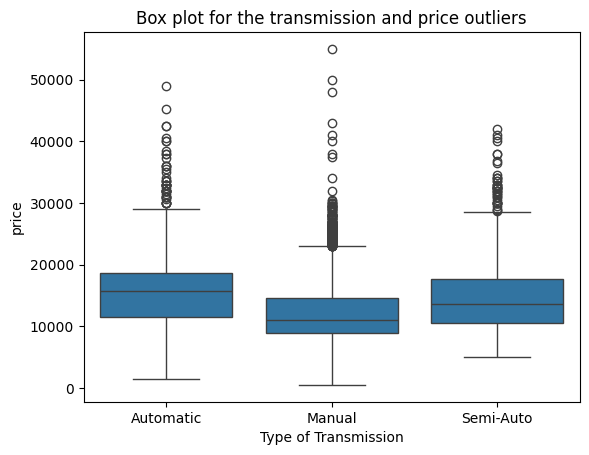

In [11]:
#box plot to determine whether cars with automatic, manual or semi-auto type of transmission have more price outliers

import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=df, x='transmission', y='price')
plt.xlabel('Type of Transmission')
plt.ylabel('price')
plt.title('Box plot for the transmission and price outliers')
plt.show()

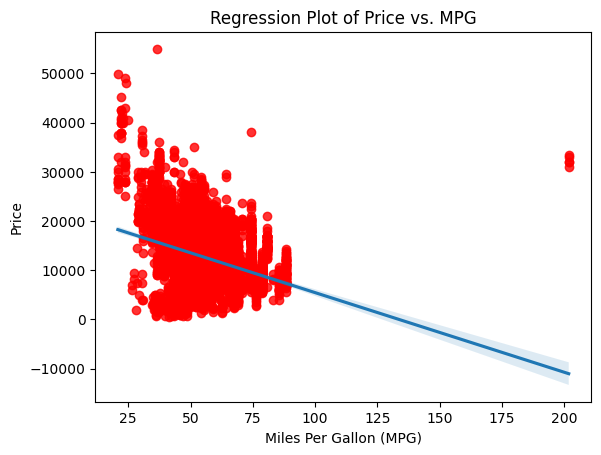

In [12]:
#Regression plot between mpg and price
sns.regplot(data=df, x='mpg', y='price',scatter_kws={'color': 'red'})
plt.title('Regression Plot of Price vs. MPG')
plt.xlabel('Miles Per Gallon (MPG)')
plt.ylabel('Price')
plt.show()

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
#Simple linear regression
#splitting the data into a test and train sets
X=df[['mpg']]
Y=df['price']
X_train,X_test,Y_train,Y_test=train_test_split(X, Y, test_size=0.2, random_state=42)

#then we train our model

LR=LinearRegression()
LR.fit(X_train, Y_train)

#we make predictions

prediction1=LR.predict(X_test)

#calculating the R squared

r2 = r2_score(Y_test, prediction1)
mse = mean_squared_error(Y_test, prediction1)

print("R^2:", r2)
print("Mean Squared Error (MSE):", mse)

R^2: 0.1504343741072478
Mean Squared Error (MSE): 19049855.140110757


In [19]:

#Multiple linear regression
#splitting the data into a test and train sets
X=df[['year','mileage','tax','mpg','engineSize']]
Y=df['price']
X_train,X_test,Y_train,Y_test=train_test_split(X, Y, test_size=0.2, random_state=42)

#then we train our model

LR2=LinearRegression()
LR2.fit(X_train, Y_train)

#we make predictions

prediction2=LR2.predict(X_test)

#calculating the R squared

r2_2 = r2_score(Y_test, prediction2)
mse_2 = mean_squared_error(Y_test, prediction2)

print("R^2:", r2_2)
print("Mean Squared Error (MSE):", mse_2)

R^2: 0.6917125923771564
Mean Squared Error (MSE): 6912744.910746688


In [20]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

#pipeline
# Step 1: Prepare the data
X = df[['year', 'mileage', 'tax', 'mpg', 'engineSize']]
Y = df['price']

# Step 2: Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Step 3: Create the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Step 3a: Standard scaling
    ('poly_features', PolynomialFeatures(degree=2)),  # Step 3b: Second degree polynomial features
    ('lin_reg', LinearRegression())  # Step 3c: Linear regression model
])

# Step 4: Fit the pipeline model
pipeline.fit(X_train, Y_train)

# Step 5: Make predictions
predictions3 = pipeline.predict(X_test)

# Step 6: Calculate R^2 and MSE
r2_3 = r2_score(Y_test, predictions3)
mse_3 = mean_squared_error(Y_test, predictions3)

print("R^2:", r2_3)
print("Mean Squared Error (MSE):", mse_3)

R^2: 0.12122807147174242
Mean Squared Error (MSE): 19704749.61491952


In [21]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

#Ridge regression object
# Step 1: Prepare the data
X = df[['year', 'mileage', 'tax', 'mpg', 'engineSize']]  # Features
Y = df['price']  # Target variable

# Step 2: Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Step 3: Create and fit a Ridge regression model with regularization parameter alpha = 0.1
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train, Y_train)

# Step 4: Make predictions on the test set
predictions4 = ridge_model.predict(X_test)

# Step 5: Calculate the R^2 value using the test data
r2_4 = r2_score(Y_test, predictions4)

print("R^2:", r2_4)

R^2: 0.6917134446113138


In [23]:
# Poly transformation
# Step 1: Prepare the data
X = df[['year', 'mileage', 'tax', 'mpg', 'engineSize']]  # Features
Y = df['price']  # Target variable

# Step 2: Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Step 3: Create polynomial features for the training and testing data
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Step 4: Create and fit a Ridge regression model with regularization parameter alpha = 0.1
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train_poly, Y_train)

# Step 5: Make predictions on the modified test set
predictions5 = ridge_model.predict(X_test_poly)

# Step 6: Calculate R^2 and MSE using the modified test data
r2_5 = r2_score(Y_test, predictions5)
mse_5 = mean_squared_error(Y_test, predictions5)

print("R^2:", r2_5)
print("Mean Squared Error (MSE):", mse_5)

/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=2.17676e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


R^2: 0.6732748888228912
Mean Squared Error (MSE): 7326174.516559619


In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

# grid search
# Step 1: Prepare the data
X1 = df[['year', 'mileage', 'tax', 'mpg', 'engineSize']]  # Features
Y1 = df['price']  # Target variable

# Step 2: Split the data into training and testing sets (80% train, 20% test)
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size=0.2, random_state=42)

# Step 3: Create polynomial features for the training data
poly1 = PolynomialFeatures(degree=2)
X_train_poly1 = poly.fit_transform(X1_train)
X_test_poly1 = poly.transform(X1_test)

# Step 4: Set up the Ridge regression model
ridge_model = Ridge()

# Step 5: Set up the Grid Search with cross-validation
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}  # Values for alpha
grid_search = GridSearchCV(estimator=ridge_model, param_grid=param_grid, cv=4, scoring='neg_mean_squared_error')

# Step 6: Fit the grid search to the training data
grid_search.fit(X_train_poly1, Y1_train)

# Get the best alpha value and the best model
best_alpha = grid_search.best_params_['alpha']
best_model = grid_search.best_estimator_

# Step 7: Make predictions using the best model on the test set
predictions6 = best_model.predict(X_test_poly1)

# Step 8: Calculate R^2 and MSE
r2_6 = r2_score(Y1_test, predictions)
mse_6 = mean_squared_error(Y1_test, predictions6)

print("Best Alpha:", best_alpha)
print("R^2:", r2_6)
print("Mean Squared Error (MSE):", mse_6)

/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=2.93807e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=2.88233e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=3.01744e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=2.78199e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=2.93807e-24): res

Best Alpha: 0.01
R^2: 0.38273414165607345
Mean Squared Error (MSE): 13840985.117578594


## Authors


[Abhishek Gagneja](https://www.linkedin.com/in/abhishek-gagneja-23051987/)


## Change Log


|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2023-12-10|0.1|Abhishek Gagneja|Initial Draft created|


Copyright © 2023 IBM Corporation. All rights reserved.
